In [365]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random
import pandas as pd

The goal of this function is to implement Lewis' Thinning Algorithm -- generation of arrival events from an inhomogeneous Poisson Process. Suppose the time-varying rate is given by an intensity function $\lambda(t)$ which can be input into our function through an array of tumples Lambda = [(lambda1, t1), (lambda2, t2),...], representing the discrete values $\lambda(t_i)$ for intensity evluated at times $t_1,t_2,...$. T denotes the maximum time we consider for the Poinsson Process. 

In [377]:
# generate test data
t = np.linspace(0, 10, 80)

Lambda = list(map(math.sin, t[:70]/2))
Lambda = [5*(i+1)/2 for i in Lambda]

Lambda.extend([0]*10)

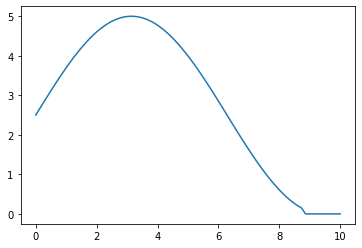

In [379]:
plt.plot(t, Lambda)
plt.show()

In [380]:
Lambda = list(zip(Lambda, t))

In [381]:
def sample_from_exponential_dist(a):
    # random sampling from exponential distribution with mean a
    # we will use inverse sampling 
    u = random.random()
    x = (1/a) * math.log(1/(1-u))
    return x


In [391]:
def inhomogeneousPoisson(Lambda, T):
    '''
    First, we aim to generate an array arrival_times[] representing the arrival time from an homogeneous Poisson Process with 
    fixed rate lambda_max up to time T; meanwhile, we also generate samples from uniform distribution on [0,1] which will decide
    whether these arrival times from homogeneous Poisson Process will be accepted as sample of the inhomogeneous Poisson Process
    '''
    lambda_max = max(Lambda[i][0] for i in range(len(Lambda)))
    
    arrival_times = [0]
    unif_samples = []
    while arrival_times[-1] <= T:
        arrival_times.append(arrival_times[-1]+sample_from_exponential_dist(lambda_max))
        unif_samples.append(random.random())
        
    # take out the first dummy time 0 and the last time which exceeds maximum time T     
    arrival_times = arrival_times[1:-1]
    
    # check if we accept each arrival time in arrival_times[]
    accepted_arrival_times = []
    for i in range(len(arrival_times)):
        # find the rate lambda[t] at the proposed arrival time
        for j in range(len(Lambda)):
            if Lambda[j][1] > arrival_times[i]:
                break
        acceptance_probability = Lambda[j][0]/lambda_max
        if acceptance_probability > unif_samples[i]:
            accepted_arrival_times.append(arrival_times[i])
    
    return accepted_arrival_times

## Plot: Single Experiment

Red cross denotes the time when arrival happens. Blue curve is the given intensity function $\lambda(t)$

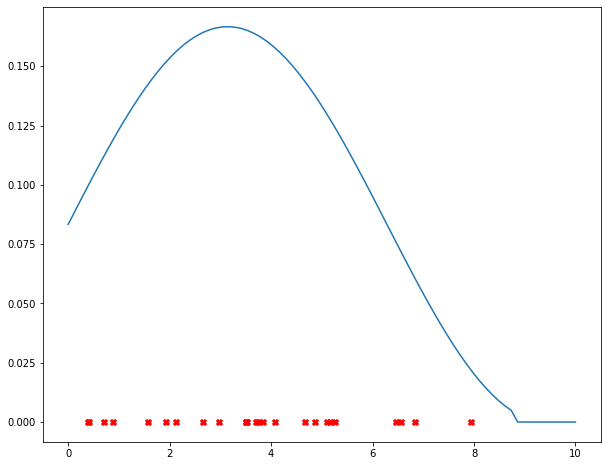

In [407]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x,y)
arrival_times = inhomogeneousPoisson(Lambda, 10)
ax.scatter(arrival_times, [0.0001]*len(arrival_times), marker='X',c='r')
plt.show()

## Sanity Check

Repeat the experiment for 1000 times and collect all the arrival times. Plot histogram on all arrival times, the curve should
have the same shape as the intensity curve $\lambda(t)$

In [403]:
all_arrival_times = []
for _ in range(1000):
    all_arrival_times.extend(inhomogeneousPoisson(Lambda, 10))

In [404]:
all_arrival_times = pd.DataFrame(all_arrival_times)

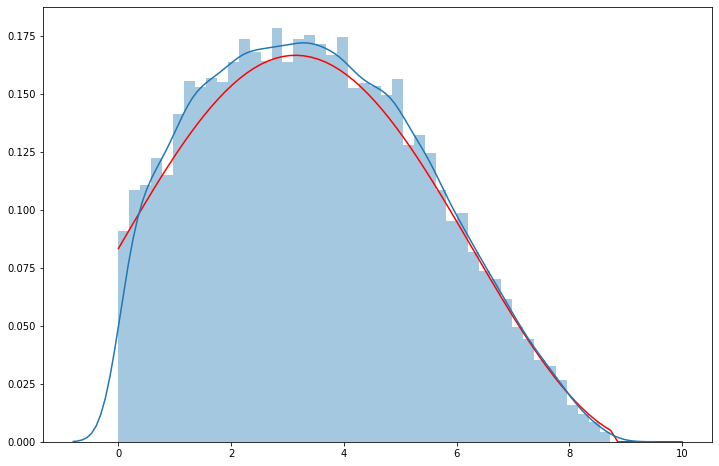

In [405]:
fig, ax = plt.subplots(figsize=(12,8))
x = [L[1] for L in Lambda] 
y = [L[0]/30 for L in Lambda]
ax.plot(x, y, color='r')
sns.distplot(all_arrival_times, ax=ax)
plt.show()